In [31]:
from Data_loader import dummy_enc, dummy_enc_y
from Data_imputation import mf_imputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from FeatureSelection import Kernal_PCA
from decision_tree_Classifiers import dt_kn_classfifier_kpca, dt_kn_classifier_kpca_kfold, dt_kn_classifier_kpca_stratfold
from GridSearch_params import split_data
import numpy as np

In [32]:
X_data = pd.read_csv("mushroom_trn_data.csv")
X_data_labels = pd.read_csv("mushroom_trn_class_labels.csv", header = None)
y = X_data_labels.drop(0, axis = 1)

In [33]:
import numpy as np
X_data['stalk-root'] = X_data['stalk-root'].replace('?', np.nan)

In [34]:
X_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,y,g,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,n,y,d
1,f,f,e,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,v,d
2,f,s,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,k,a,g
3,x,s,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,v,d
4,x,s,n,f,s,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,x,f,e,t,n,f,c,b,p,t,...,s,p,g,p,w,o,p,n,v,d
7307,x,y,n,f,n,f,w,n,w,e,...,f,w,n,p,w,o,e,w,v,l
7308,f,f,w,f,n,f,w,b,p,t,...,s,w,w,p,w,o,e,k,a,g
7309,x,f,g,t,n,f,c,b,w,t,...,s,g,p,p,w,o,p,n,y,d


In [35]:
sscaler = StandardScaler()
X_data_enc = dummy_enc(X_data)
x_data_mean = mf_imputer(X_data_enc)
X_data_sc = sscaler.fit_transform(x_data_mean)

In [36]:
X_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,y,g,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,n,y,d
1,f,f,e,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,v,d
2,f,s,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,k,a,g
3,x,s,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,v,d
4,x,s,n,f,s,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,x,f,e,t,n,f,c,b,p,t,...,s,p,g,p,w,o,p,n,v,d
7307,x,y,n,f,n,f,w,n,w,e,...,f,w,n,p,w,o,e,w,v,l
7308,f,f,w,f,n,f,w,b,p,t,...,s,w,w,p,w,o,e,k,a,g
7309,x,f,g,t,n,f,c,b,w,t,...,s,g,p,p,w,o,p,n,y,d


In [37]:
X_data_enc

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7307,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
7308,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7309,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [38]:
x_data_mean

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7307,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7308,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7309,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x_data_pca = Kernal_PCA(X_data_sc)

In [40]:
x_tr, x_te, y_tr, y_te = split_data(x_data_pca, y)

Decision Tree Classifier without using any Cross-Validation Technique with Kernel PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       0.94      0.96      0.95       747
           p       0.96      0.93      0.95       716

    accuracy                           0.95      1463
   macro avg       0.95      0.95      0.95      1463
weighted avg       0.95      0.95      0.95      1463

Plotting the Confusion Matrix


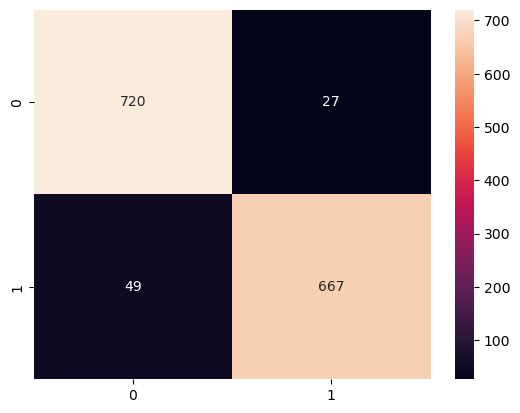

In [41]:
dt_kn_classfifier_kpca(x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with K-Fold Cross-Validation Technique(K = 10) with Kernel PCA Feature Selection
Classification Report
	Precision Score(Macro): 0.95
	Precision Score(Weighted): 0.95

	Recall Score(Macro): 0.95
	Recall Score(Weighted): 0.95

	F1 Score(Macro): 0.95
	F1 Score(Weighted): 0.95
	Accuracy Score: 0.95
Plotting the Confusion Matrix


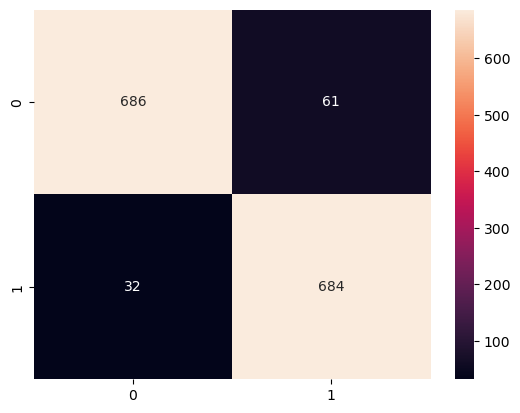

In [42]:
dt_kn_classifier_kpca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with Stratified K-Fold Cross-Validation Technique and Kernel PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 0.95
	Precision Score(Weighted): 0.95

	Recall Score(Macro): 0.95
	Recall Score(Weighted): 0.95

	F1 Score(Macro): 0.95
	F1 Score(Weighted): 0.95
	Accuracy Score: 0.95
Plotting the Confusion Matrix


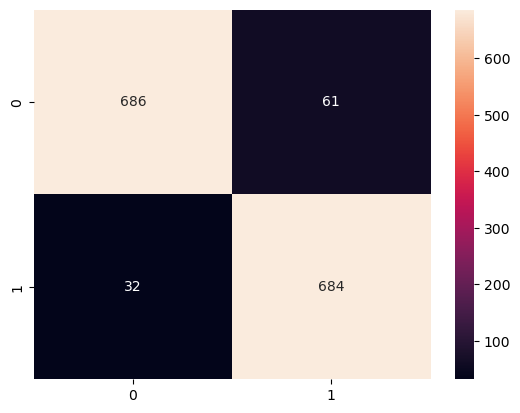

In [43]:
dt_kn_classifier_kpca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [44]:
from random_forest_classifier import rft_kn_classifier_kpca, rft_kn_classifier_kpca_kfold, rft_kn_classifier_kpca_stratfold

Random Forest Tree Classifier without using any Cross-Validation Technique and Kernel PCA Feature Selection


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       747
           p       1.00      1.00      1.00       716

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


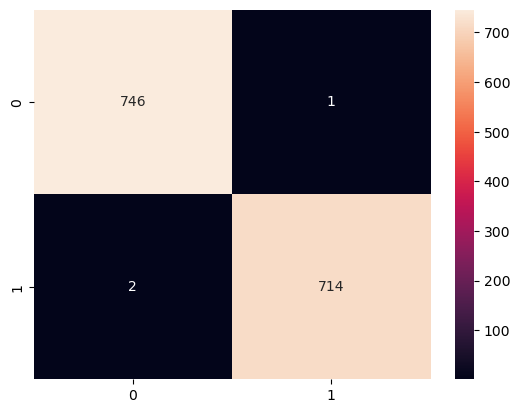

In [45]:
rft_kn_classifier_kpca(x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and Kernel PCA Feature Extraction


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

	Accuracy Score: 1.00
Plotting the Confusion Matrix


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

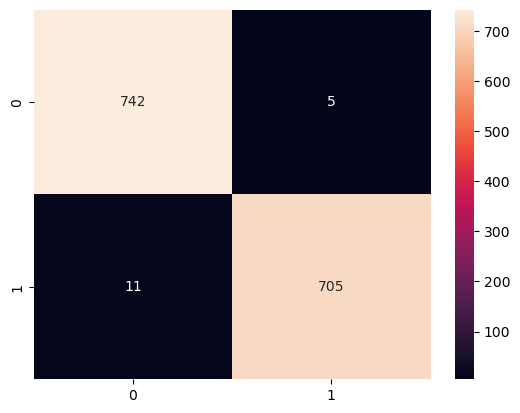

In [46]:
rft_kn_classifier_kpca_kfold(x_data_pca,y,  x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with Stratified K-Fold Cross-Validation Technique and Kernel PCA Feature Extraction Technique


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

	Accuracy Score: 1.00
Plotting the Confusion Matrix


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

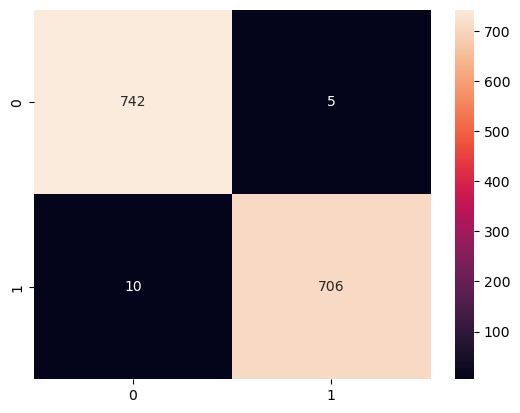

In [47]:
rft_kn_classifier_kpca_stratfold(x_data_pca, y,x_tr, x_te, y_tr, y_te )

In [48]:
from logistic_regression_classifier import lr_kn_classifier_kpca, lr_kn_classifier_kpca_kfold, lr_kn_classifier_kpca_stratfold

Logistic Regression Classifier without using any Cross-Validation Technique and Kernel PCA Feature Selection
Classification Report


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           e       0.84      0.97      0.90       747
           p       0.96      0.81      0.88       716

    accuracy                           0.89      1463
   macro avg       0.90      0.89      0.89      1463
weighted avg       0.90      0.89      0.89      1463

Plotting the Confusion Matrix


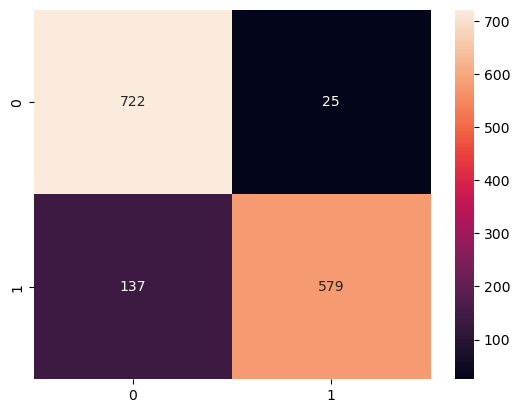

In [49]:
lr_kn_classifier_kpca(x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and Kernel PCA Feature Extraction


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Classification Report
	Precision Score(Macro): 0.89
	Precision Score(Weighted): 0.89

	Recall Score(Macro): 0.88
	Recall Score(Weighted): 0.88

	F1 Score(Macro): 0.88
	F1 Score(Weighted): 0.88


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

	Accuracy Score: 0.88
Plotting the Confusion Matrix


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

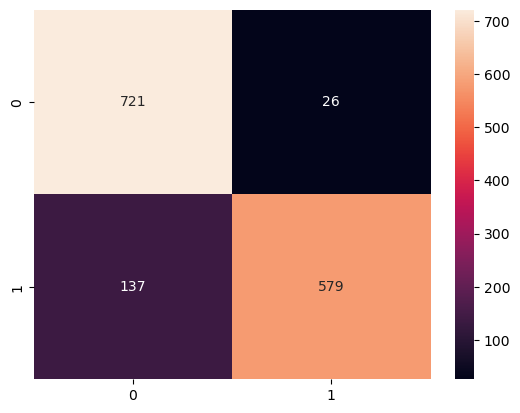

In [50]:
lr_kn_classifier_kpca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Logistic Regression Classifier with Stratified K-Fold Cross-Validation Technique and Kernel PCA Feature Extraction Technique


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Classification Report
	Precision Score(Macro): 0.89
	Precision Score(Weighted): 0.89

	Recall Score(Macro): 0.88
	Recall Score(Weighted): 0.88

	F1 Score(Macro): 0.88
	F1 Score(Weighted): 0.88


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

	Accuracy Score: 0.88
Plotting the Confusion Matrix


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

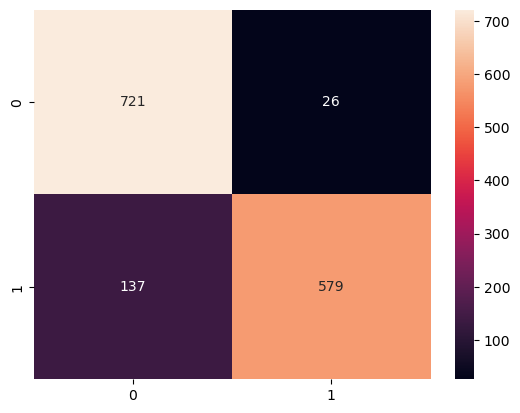

In [51]:
lr_kn_classifier_kpca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [52]:
y_enc = dummy_enc_y(y)
x_tr_y, x_te_y, y_tr_y, y_te_y = split_data(x_data_pca, y_enc)

In [53]:
from XGBoost_classifier import xgb_kn_classifier_kpca, xgb_kn_classifier_kpca_kfold, xgb_kn_classifier_kpca_stratfold

XGBoosting Classifier without using any Cross-Validation Technique and Kernel PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       747
           1       1.00      1.00      1.00       716

   micro avg       1.00      1.00      1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463
 samples avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


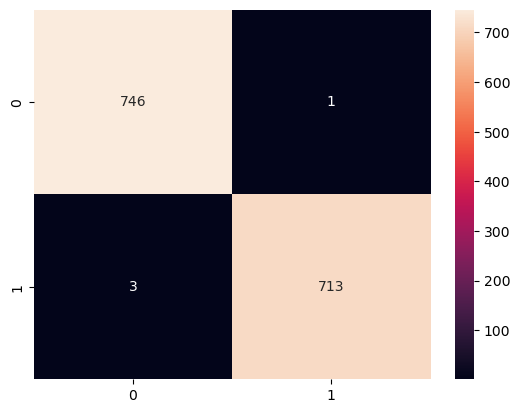

In [54]:
xgb_kn_classifier_kpca(x_tr_y, x_te_y, y_tr_y, y_te_y)

XGBoosting Classifier with K-Fold Cross-Validation Technique(K = 10) and Kernel PCA Feature Extraction
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


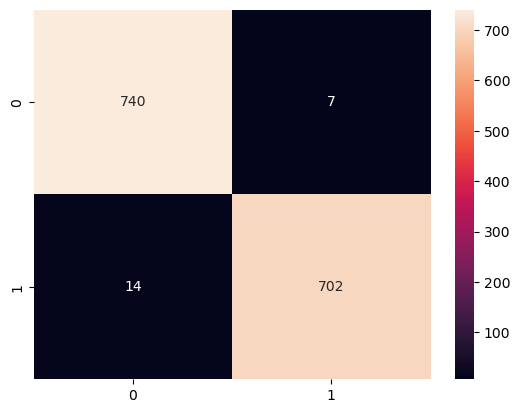

In [55]:
xgb_kn_classifier_kpca_kfold(x_data_pca, y_enc, x_tr_y, x_te_y, y_tr_y, y_te_y)

XGBoosting with Stratified K-Fold Cross-Validation Technique and Kernel PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


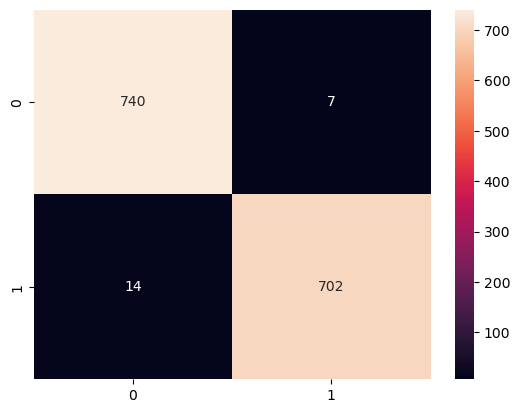

In [56]:
xgb_kn_classifier_kpca_stratfold(x_data_pca, y, x_tr_y, x_te_y, y_tr_y, y_te_y)

In [57]:
from support_vector_classifier import svc_kn_classifier_kpca, svc_kn_classifier_kpca_kfold, svc_kn_classifier_kpca_stratfold


Random Forest Tree Classifier without using any Cross-Validation Technique and Kernel PCA Feature Selection


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report
              precision    recall  f1-score   support

           e       0.98      0.93      0.95       747
           p       0.93      0.98      0.95       716

    accuracy                           0.95      1463
   macro avg       0.95      0.95      0.95      1463
weighted avg       0.95      0.95      0.95      1463

Plotting the Confusion Matrix


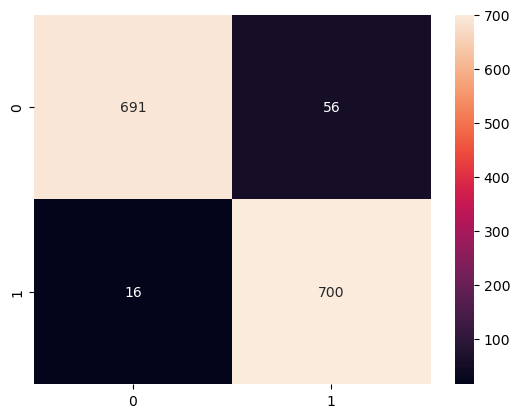

In [58]:
svc_kn_classifier_kpca(x_tr, x_te, y_tr, y_te)


SVC with K-Fold Cross-Validation Technique(K = 10) and Kernel PCA Feature Extraction


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Classification Report
	Precision Score(Macro): 0.96
	Precision Score(Weighted): 0.96

	Recall Score(Macro): 0.96
	Recall Score(Weighted): 0.96

	F1 Score(Macro): 0.96
	F1 Score(Weighted): 0.96


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

	Accuracy Score: 0.96
Plotting the Confusion Matrix


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

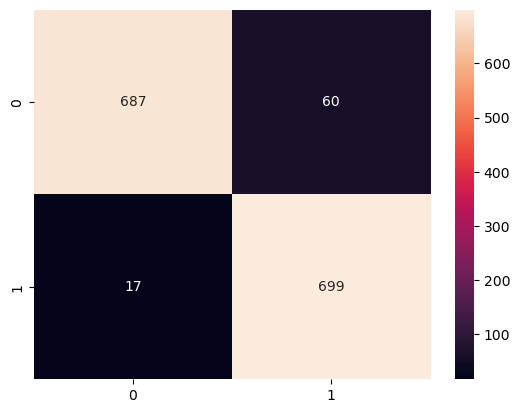

In [59]:
svc_kn_classifier_kpca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)


SVC Classifier with Stratified K-Fold Cross-Validation Technique and Kernel PCA Feature Extraction Technique


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Classification Report
	Precision Score(Macro): 0.96
	Precision Score(Weighted): 0.96

	Recall Score(Macro): 0.96
	Recall Score(Weighted): 0.96

	F1 Score(Macro): 0.96
	F1 Score(Weighted): 0.96


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

	Accuracy Score: 0.96
Plotting the Confusion Matrix


/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aarvee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

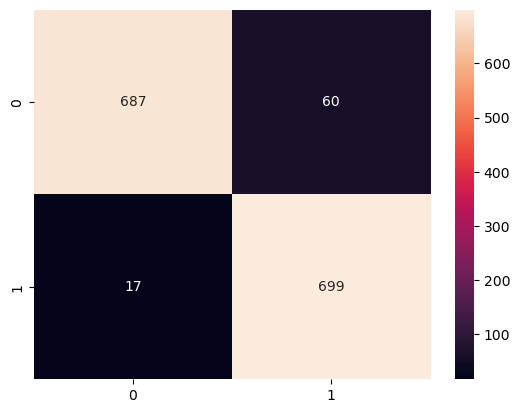

In [60]:
svc_kn_classifier_kpca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)
